In [ ]:
!# --- Importações Necessárias --- import numpy as np import matplotlib.pyplot as plt from skimage import data, img_as_float, img_as_ubyte, exposure, util, filters from scipy import ndimage from numpy.fft import fft2, ifft2, fftshift, ifftshift import cv2 # used in the example 5.6 to cv2.line  # --- load image Médica e defines variable Globais --- try:  brain_volume = data.brain()  if brain_volume.ndim == 3:  slice_index = brain_volume.shape[0] // 2  image_gray_orig_c5 = brain_volume[slice_index, :, :]  elif brain_volume.ndim == 2:  image_gray_orig_c5 = brain_volume  slice_index = "N/A (Imagem 2D)"  else:  raise ValueError("Formato de imagem 'brain' não esperado.")  print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada to Cap. 5.") except Exception as e:  print(f"Erro ao carregar 'brain': {e}. Usando 'camera' as fallback.")  image_gray_orig_c5 = data.camera()  image_float_c5 = img_as_float(image_gray_orig_c5.copy()) M_c5, N_c5 = image_float_c5.shape # dimensions original P_c5, Q_c5 = 2*M_c5, 2*N_c5 # dimensions with padding  # --- function Auxiliar to IDFT, Extração e Reescalonamento --- def idft_process_extract(G_centralizado, P_img, Q_img, M_orig, N_orig):  G_canto_dc = ifftshift(G_centralizado)  img_padded_spatial = ifft2(G_canto_dc).real  img_final = img_padded_spatial[0:M_orig, 0:N_orig]  return exposure.rescale_intensity(img_final, out_range=(0,1))  # --- function Auxiliar of Plotagem --- def plot_images_c5(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):  num_images = len(images)  if cols is None:  cols = (num_images + rows - 1) // rows  fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)  axes_flat = axes.ravel()  if cmaps is None: cmaps_list = ['gray'] * num_images  elif isinstance(cmaps, str): cmaps_list = [cmaps] * num_images  else:  cmaps_list = list(cmaps)  if len(cmaps_list) < num_images: cmaps_list.extend(['gray']*(num_images-len(cmaps_list)))  for i in range(len(axes_flat)):  if i < num_images:  img, title, cmap_val = images[i], titles[i], cmaps_list[i] # Renomeado cmap to cmap_val  axes_flat[i].imshow(img, cmap=cmap_val if img.ndim==2 else None); axes_flat[i].set_title(title); axes_flat[i].axis('off')  else: axes_flat[i].axis('off')  plt.tight_layout(); plt.show()   L_mov_c5 = 21 psf_movimento_c5 = np.zeros((L_mov_c5, L_mov_c5), dtype=float) psf_movimento_c5[L_mov_c5//2, :] = 1.0 psf_movimento_c5 /= np.sum(psf_movimento_c5)  psf_movimento_padded_rolled_c5 = np.zeros((P_c5, Q_c5), dtype=float) r_offset_c5, c_offset_c5 = L_mov_c5//2, L_mov_c5//2 for r_psf in range(L_mov_c5):  for c_psf in range(L_mov_c5):  idx_r_pad = (r_psf - r_offset_c5 + P_c5) % P_c5  idx_c_pad = (c_psf - c_offset_c5 + Q_c5) % Q_c5  psf_movimento_padded_rolled_c5[idx_r_pad, idx_c_pad] = psf_movimento_c5[r_psf, c_psf] H_movimento_nao_centralizado_c5 = fft2(psf_movimento_padded_rolled_c5) # DC in the corner  fp_para_degradacao_c5 = np.zeros((P_c5, Q_c5)) fp_para_degradacao_c5[0:M_c5, 0:N_c5] = image_float_c5 F_img_original_padded_nao_centralizado_c5 = fft2(fp_para_degradacao_c5)  G_degradada_mov_nao_centralizado_c5 = F_img_original_padded_nao_centralizado_c5 * H_movimento_nao_centralizado_c5 img_degradada_mov_padded_c5 = ifft2(G_degradada_mov_nao_centralizado_c5).real img_degradada_mov_c5 = exposure.rescale_intensity(img_degradada_mov_padded_c5[0:M_c5, 0:N_c5], out_range=(0,1))    # --- Importações Necessárias --- import numpy as np import matplotlib.pyplot as plt from skimage import data, img_as_float, img_as_ubyte, exposure, util, filters from scipy import ndimage from numpy.fft import fft2, ifft2, fftshift, ifftshift import cv2 # used in the example 5.6 to cv2.line  # --- load image Médica e defines variable Globais --- try:  brain_volume = data.brain()  if brain_volume.ndim == 3:  slice_index = brain_volume.shape[0] // 2  image_gray_orig_c5 = brain_volume[slice_index, :, :]  elif brain_volume.ndim == 2:  image_gray_orig_c5 = brain_volume  slice_index = "N/A (Imagem 2D)"  else:  raise ValueError("Formato de imagem 'brain' não esperado.")  print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada to Cap. 5.") except Exception as e:  print(f"Erro ao carregar 'brain': {e}. Usando 'camera' as fallback.")  image_gray_orig_c5 = data.camera()  image_float_c5 = img_as_float(image_gray_orig_c5.copy()) M_c5, N_c5 = image_float_c5.shape # dimensions original P_c5, Q_c5 = 2*M_c5, 2*N_c5 # dimensions with padding  # --- function Auxiliar to IDFT, Extração e Reescalonamento --- def idft_process_extract(G_centralizado, P_img, Q_img, M_orig, N_orig):  G_canto_dc = ifftshift(G_centralizado)  img_padded_spatial = ifft2(G_canto_dc).real  img_final = img_padded_spatial[0:M_orig, 0:N_orig]  return exposure.rescale_intensity(img_final, out_range=(0,1))  # --- function Auxiliar of Plotagem (CORRIGIDA to use plot_images_c5 consistentemente) --- def plot_images_c5(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):  num_images = len(images)  if cols is None:  cols = (num_images + rows - 1) // rows  fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)  axes_flat = axes.ravel()  if cmaps is None: cmaps_list = ['gray'] * num_images  elif isinstance(cmaps, str): cmaps_list = [cmaps] * num_images  else:  cmaps_list = list(cmaps)  if len(cmaps_list) < num_images: cmaps_list.extend(['gray']*(num_images-len(cmaps_list)))  for i in range(len(axes_flat)):  if i < num_images:  img, title, cmap_val = images[i], titles[i], cmaps_list[i] # Renomeado cmap to cmap_val  axes_flat[i].imshow(img, cmap=cmap_val if img.ndim==2 else None); axes_flat[i].set_title(title); axes_flat[i].axis('off')  else: axes_flat[i].axis('off')  plt.tight_layout(); plt.show()    # generate the image degradada by movimento e H_movimento (of the example 5.6) # to that the examples 5.7, 5.8, 5.9 can run  L_mov_c5 = 21 psf_movimento_c5 = np.zeros((L_mov_c5, L_mov_c5), dtype=float) psf_movimento_c5[L_mov_c5//2, :] = 1.0 psf_movimento_c5 /= np.sum(psf_movimento_c5)  psf_movimento_padded_rolled_c5 = np.zeros((P_c5, Q_c5), dtype=float) r_offset_c5, c_offset_c5 = L_mov_c5//2, L_mov_c5//2 for r_psf in range(L_mov_c5):  for c_psf in range(L_mov_c5):  idx_r_pad = (r_psf - r_offset_c5 + P_c5) % P_c5  idx_c_pad = (c_psf - c_offset_c5 + Q_c5) % Q_c5  psf_movimento_padded_rolled_c5[idx_r_pad, idx_c_pad] = psf_movimento_c5[r_psf, c_psf] H_movimento_nao_centralizado_c5 = fft2(psf_movimento_padded_rolled_c5) # DC in the corner  fp_para_degradacao_c5 = np.zeros((P_c5, Q_c5)) fp_para_degradacao_c5[0:M_c5, 0:N_c5] = image_float_c5 F_img_original_padded_nao_centralizado_c5 = fft2(fp_para_degradacao_c5)  G_degradada_mov_nao_centralizado_c5 = F_img_original_padded_nao_centralizado_c5 * H_movimento_nao_centralizado_c5 img_degradada_mov_padded_c5 = ifft2(G_degradada_mov_nao_centralizado_c5).real img_degradada_mov_c5 = exposure.rescale_intensity(img_degradada_mov_padded_c5[0:M_c5, 0:N_c5], out_range=(0,1))   # --- Importações Necessárias --- import numpy as np import matplotlib.pyplot as plt from skimage import data, img_as_float, img_as_ubyte, transform, exposure, util, filters, morphology from scipy import ndimage from numpy.fft import fft2, ifft2, fftshift, ifftshift # to the Bloco 4 of the practice import time import cv2 # to draw círculos in the Tarefa 1.3  # --- function Auxiliar to plot Múltiplas images --- def plot_images(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):  num_images = len(images)  if cols is None:  cols = (num_images + rows - 1) // rows   fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False) # squeeze=False garante that axes é always 2D   axes_flat = axes.ravel()   if cmaps is None:  cmaps_list = ['gray'] * num_images  elif isinstance(cmaps, str):  cmaps_list = [cmaps] * num_images  else:  cmaps_list = list(cmaps)  if len(cmaps_list) < num_images:  cmaps_list.extend(['gray'] * (num_images - len(cmaps_list)))   for i in range(len(axes_flat)):  if i < num_images:  img = images[i]  title = titles[i]  current_cmap = cmaps_list[i]   axes_flat[i].imshow(img, cmap=current_cmap if img.ndim == 2 else None)  axes_flat[i].set_title(title)  axes_flat[i].axis('off')  else:  axes_flat[i].axis('off') # Desliga axes extras   plt.tight_layout()  plt.show()  # --- load image Médica --- try:  brain_volume = data.brain()  if brain_volume.ndim == 3:  slice_index = brain_volume.shape[0] // 2  image_gray_orig = brain_volume[slice_index, :, :]  elif brain_volume.ndim == 2:  image_gray_orig = brain_volume  slice_index = "N/A (Imagem 2D)"  else:  raise ValueError("Formato de imagem 'brain' não esperado.")  print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada.") except Exception as e:  print(f"Erro ao carregar 'brain': {e}. Usando 'camera' as fallback.")  image_gray_orig = data.camera()  # ESTAS are the variable GLOBAIS to the practice image_float_g = img_as_float(image_gray_orig.copy()) image_ubyte_g = img_as_ubyte(image_gray_orig.copy()) M_g, N_g = image_float_g.shape # dimensions globais to the practice  

Imagem 'brain' (fatia 5) carregada para Cap. 5.
Imagem 'brain' (fatia 5) carregada para Cap. 5.
Imagem 'brain' (fatia 5) carregada.


Detecção of Bordas with Sobel (practice)

objective: apply the operador of Sobel to detect bordas in the image médica.

the code Funciona:1. load image: uses image_float_g (image of the cérebro).2. filter of Sobel:* `filters.sobel_h(image_float_g)`: calculates the componente horizontal of the gradiente (gx​).* `filters.sobel_v(image_float_g)`: calculates the componente vertical of the gradiente (gy​).* `filters.sobel(image_float_g)`: calculates the magnitude of the gradiente M(x,y) directly.3. Limiarização of the Magnitude:* `mag_sobel > limiar_sobel`: creates the image binary of bordas. Pixels where the magnitude of the gradiente excede the limiar are considerados bordas.4. Visualização: shows the original image, the componentes g_{x}​,g_{y}​, the magnitude of the gradiente and the edges limiarizadas.


--- Exemplo Prático: Detecção de Bordas com Sobel ---


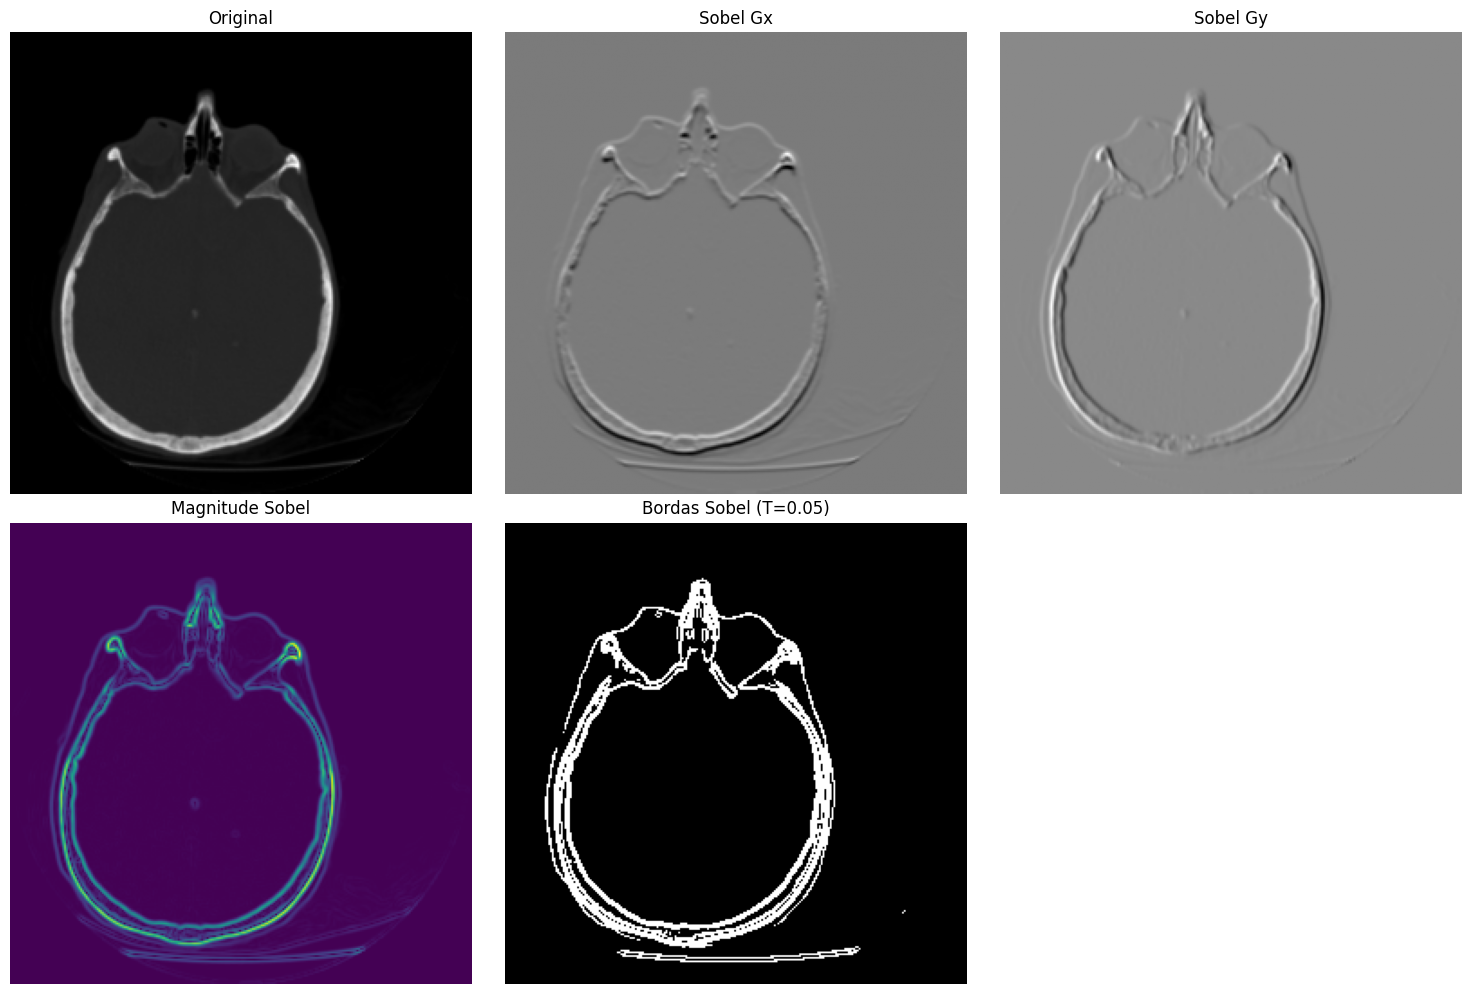

In [ ]:
# example Python: Detecção of Bordas with Sobel print("\n--- Exemplo Prático: Detecção de Bordas with Sobel ---") from skimage import filters # filters already was importado, but to clareza  # apply Sobel sob_h = filters.sobel_h(image_float_g) # Componente horizontal g_x sob_v = filters.sobel_v(image_float_g) # Componente vertical g_y mag_sobel = filters.sobel(image_float_g) # Magnitude of the gradiente  # Limiarizar the magnitude to get the image of bordas binary limiar_sobel_val = 0.05 # Ajuste este value bordas_sobel = mag_sobel > limiar_sobel_val  plot_images_c5([image_float_g, sob_h, sob_v, mag_sobel, bordas_sobel],  ["Original", "Sobel Gx", "Sobel Gy", "Magnitude Sobel", f"Bordas Sobel (T={limiar_sobel_val})"],  rows=2, cols=3, figsize=(15,10),  cmaps=['gray','gray','gray','viridis','gray']) # use viridis to magnitude  

Interpretando the results (Sobel):* original: the image of entrada.* Sobel Gx: Realça bordas vertical. Áreas clear/dark indicate transições of intensidade in the direção horizontal.* Sobel Gy: Realça bordas horizontal. Áreas clear/dark indicate transições in the direção vertical.* Magnitude Sobel: shows the "força" of the edges in all the direções. Bordas strong aparecem more bright. the `cmap='viridis'` ajuda the visualize the variações of magnitude.* Bordas Sobel (Limiarizadas): image binary showing the pixels classificados the borda.

small exercise (Detecção of Bordas):* Altere the value of `limiar_sobel_val` to `0.02, 0.1 and 0.2`. the that acontece with the number of bordas detectadas? the limiar afeta the detecção of bordas weak vs. strong?* Substitua `filters.sobel` by `filters.prewitt` or `filters.roberts`. Compare visually the results of the magnitude of the gradiente. which parece more sensível the noise?

Detecção of Bordas with Canny (practice)objective: apply the detector of bordas of Canny, observando the effect of your parameters.

the code Funciona:1. `filters.canny(image_float_g, sigma=..., low_threshold=..., high_threshold=...)`:* `image_float_g`: image of entrada.* `sigma`: deviation standard of the Gaussiana to suavização initial. one `sigma` larger suaviza more, detectando bordas more proeminentes and less noise.* `low_threshold, high_threshold`: Limiares to the histerese. the values are generally defined in relação to the range of magnitudes of the gradiente of the image.2. Visualização: shows the original image and the result of the Canny.


--- Exemplo Prático: Detecção de Bordas com Canny ---


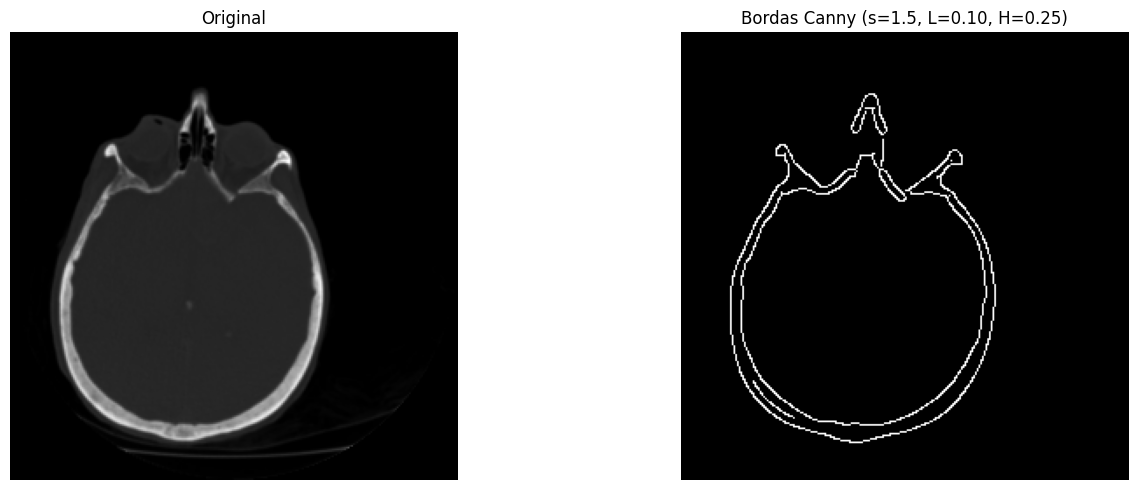

In [ ]:
# example Python: Detecção of Bordas with Canny - CORRIGIDO print("\n--- Exemplo Prático: Detecção de Bordas with Canny ---") from skimage import feature # Importação CORRETA to Canny  # parameters to Canny (estes can precisar of ajuste to your image) sigma_canny_c10 = 1.5 # Aumentar one pouco the sigma to mais suavização initial low_thresh_canny_c10 = 0.1 high_thresh_canny_c10 = 0.25   bordas_canny_c10 = feature.canny(image_float_g, sigma=sigma_canny_c10,  low_threshold=low_thresh_canny_c10,  high_threshold=high_thresh_canny_c10)  plot_images_c5([image_float_g, bordas_canny_c10],  ["Original", f"Bordas Canny (s={sigma_canny_c10}, L={low_thresh_canny_c10:.2f}, H={high_thresh_canny_c10:.2f})"],  cmaps=['gray','gray']) # plot_images_c5 é the function corrigida 

Interpretando the results (Canny):* original: image of entrada.* Bordas Canny: image binary showing the edges detectadas by the algoritmo of Canny. Espera-if that the edges are thin (due to the supressão of não-máximos), well localizadas and continuous (due to the limiarização by histerese). the qualidade of the edges dependerá of the escolha adequada of the parameters `sigma, low_threshold and high_threshold`.

exercise (Canny):1. Varie the parameter `sigma_canny_c10` (ex: 0.5, 2.0, 3.0). the This afeta the edges detectadas? the that acontece with the noise and the thin details?2. Mantenha `sigma_canny_c10` fixed (ex: 1.5) and varie `low_threshold_c10` and `high_threshold_c10`. (Lembre-if that TH should be larger that TL​, typically TH​≈(2)×TL​).* Try diminuir ambos (ex: L=0.05, H=0.1).* Try aumentar ambos (ex: L=0.2, H=0.4).* the escolha of the limiares afeta the continuidade of the edges and the quantidade of bordas weak that are incluídas?

Python - Limiarização Global simple and histogram (practice)

objective: visualize the histogram of the image and apply one limiar global escolhido manually.

the code Funciona:1. histogram: `exposure.histogram(image_ubyte_g)` calculates the histogram of the image (convertida to 8 bits to facilitar the visualização of the histogram of 0-255). `nbins=256` garante one bin to each level of gray.2. Escolha of the Limiar manual: one value `limiar_manual` is defined. this value should be escolhido observando the histogram (procurando one vale).3. Aplicação of the Limiar: `image_float_g > limiar_manual_norm` creates the image booleana (True/False), that is then convertida to 0 or 1, or can be usada directly for visualization (matplotlib interpreta True the 1, False the 0). `limiar_manual_norm` is the limiar escalonado to the image float [0,1].4. Visualização: shows the original image, its histogram (with the limiar marcado) and the image segmentada.


--- Exemplo Prático: Limiarização Global Simples ---


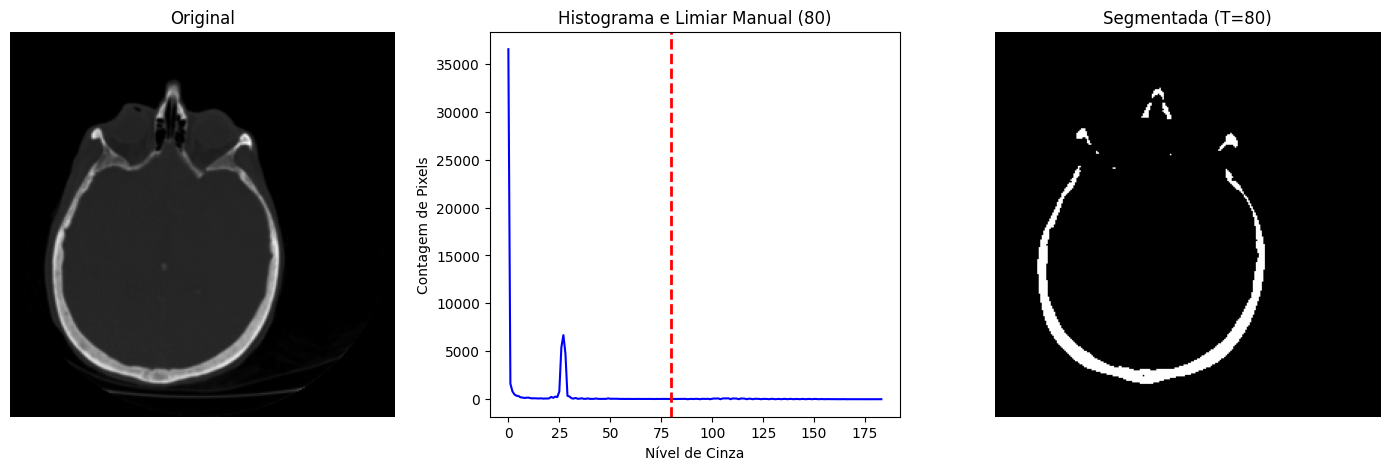

In [ ]:
# example Python: Limiarização Global simple e histogram print("\n--- Exemplo Prático: Limiarização Global Simples ---")  # calculate e plot the histogram of the image ubyte hist_original_c10, bins_orig_c10 = exposure.histogram(image_ubyte_g, nbins=256, source_range='image')  # Escolher one limiar manual observando the histogram (value between 0-255) limiar_manual_ubyte = 80 # example, ajuste este value! # convert to the scale of the image float [0,1] if for usá-la limiar_manual_float = limiar_manual_ubyte / 255.0  # apply the limiar to the image float img_limiarizada_manual = image_float_g > limiar_manual_float  # Visualização fig, axes = plt.subplots(1, 3, figsize=(18, 5)) axes[0].imshow(image_float_g, cmap='gray'); axes[0].set_title('Original'); axes[0].axis('off')  axes[1].plot(bins_orig_c10, hist_original_c10, color='blue') axes[1].axvline(limiar_manual_ubyte, color='red', linestyle='dashed', linewidth=2) axes[1].set_title(f'histogram e Limiar Manual ({limiar_manual_ubyte})') axes[1].set_xlabel('Nível de gray'); axes[1].set_ylabel('Contagem de Pixels')  axes[2].imshow(img_limiarizada_manual, cmap='gray'); axes[2].set_title(f'Segmentada (T={limiar_manual_ubyte})'); axes[2].axis('off') plt.show()

exercise (Limiarização manual):1. Observe the histogram of the image `image_ubyte_g`. Try identify visually one "vale" between two picos.2. Altere the value of `limiar_manual_ubyte` to different values (ex: one value in the meio of one pico, one value in one vale different).3. the escolha of the limiar afeta drasticamente the result of the segmentação? which would be one bom limiar to separate, by example, the cérebro of the fundo in the image `image_ubyte_g`?

Python - method of Otsu and Limiarização Adaptativa (practice)

objective: apply the method of Otsu to limiarização global automatic and one method of limiarização adaptativa.

the code Funciona:1. method of Otsu:* `filters.threshold_otsu(image_ubyte_g)`: calculates automatically the limiar ótimo to `image_ubyte_g`.* `img_otsu = image_ubyte_g > limiar_otsu`: applies the limiar.2. Limiarização Adaptativa (example with average Local):* `filters.threshold_local(image_float_g, block_size=..., method='gaussian', offset=...)`: calculates one limiar to each pixel baseado in the your vizinhança.`block_size`: size of the vizinhança to calculate the limiar local (should be ímpar).`method='gaussian'`: uses the average ponderada Gaussiana of the vizinhança. `'mean'` would use the average aritmética.`offset`: constant subtraída of the average local to calculate the limiar. Ajusta the sensibilidade.* `img_adaptativa = image_float_g > limiar_adaptativo`.3. Visualização: Compara the original, result of Otsu and result adaptativo.


--- Exemplo Prático: Otsu e Limiarização Adaptativa ---


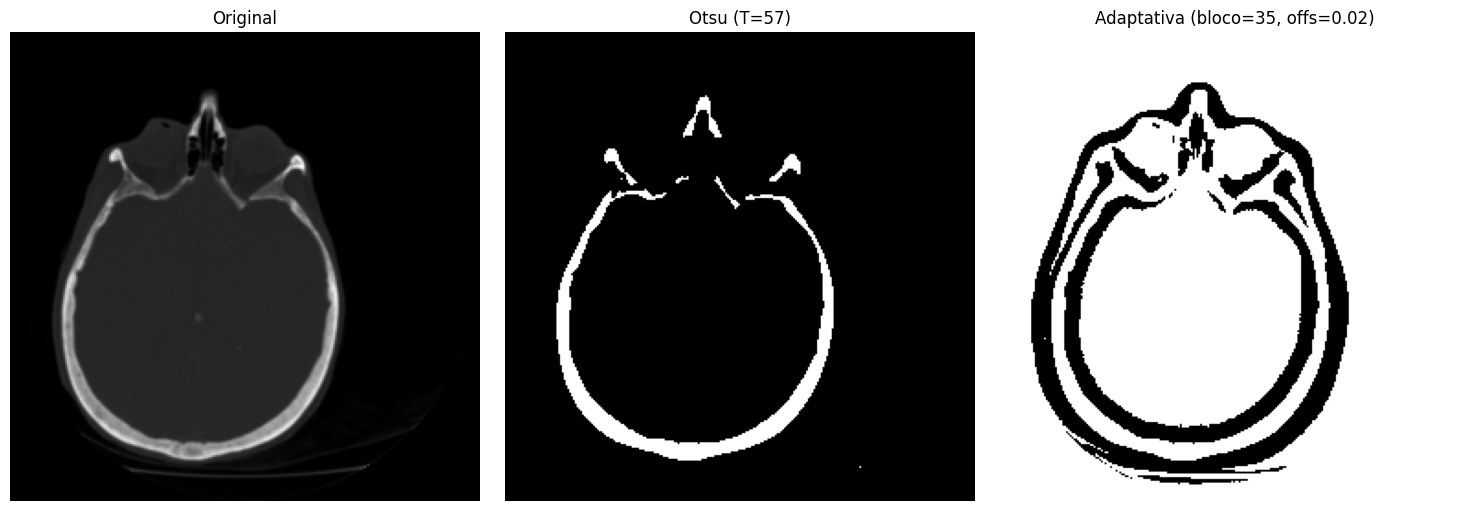

In [ ]:
# example Python: method of Otsu e Limiarização Adaptativa print("\n--- Exemplo Prático: Otsu e Limiarização Adaptativa ---")  # method of Otsu (Global) limiar_otsu = filters.threshold_otsu(image_ubyte_g) # calculates the limiar ótimo img_otsu = image_ubyte_g > limiar_otsu # applies the limiar  # Limiarização Adaptativa Local (ex: using average Gaussiana of the vizinhança) # block_size should be ímpar e larger that 1 block_size_adapt = 35 # size of the vizinhança local. Ajuste este value. offset_adapt = 0.02 # Offset to adjust the limiar local. Ajuste este value. # threshold_local returns the image of limiares, one to cada pixel. limiares_adaptativos = filters.threshold_local(image_float_g, block_size=block_size_adapt,  method='gaussian', offset=offset_adapt) img_adaptativa = image_float_g > limiares_adaptativos  plot_images_c5([image_float_g, img_otsu, img_adaptativa],  ["Original", f"Otsu (T={limiar_otsu})", f"Adaptativa (bloco={block_size_adapt}, offs={offset_adapt})"],  cmaps=['gray','gray','gray'])

Interpretando the results (Otsu and Adaptativa):1. Otsu: Observe the image segmentada. the method of Otsu tentou find the "better" limiar global. Funcionou well to this image? Compare with the limiar manual that you escolheu before.2. Adaptativa: the limiarização adaptativa should lidar better with variações locais of iluminação or contraste. Compare the result with Otsu. it segmentou better regiões that had brilho different, but pertenciam to the same "type" of object?3. parameters of the Adaptativa: the `block_size` defines the quão "local" is the adaptação. one `block_size` small if adapta the variações very locais (can be ruidoso). one `block_size` large if aproxima of the limiarização global. the `offset` ajusta the limiar to cima or to low of the average local; one `offset` negative torna the limiar more low (more pixels brancos), one positive torna more high (more pixels pretos).

exercise (Otsu and Adaptativa):

1. to the limiarização adaptativa, experimente different values of `block_size_adapt` (ex: 15, 55, 101) and `offset_adapt` (ex: -0.05, 0, 0.05). the these parameters afetam the segmentação? which combinação parece better to the image médica?2. Crie the image with iluminação não uniforme artificially (ex: adicione one gradiente of brilho to the `image_float_g`). Aplique Otsu and the limiarização adaptativa the it. which lida better with the iluminação desigual?

Python - Crescimento of Regiões (Conceitual/Simplificado)

objective: Ilustrar the concept basic of crescimento of regiões the partir of the semente. the implementação complete is complex, but we can simular the idea.

the code Funciona:1. Semente and Limiar: `semente_linha, semente_coluna` define the point initial. `limiar_similaridade_rg` defines quão different one pixel vizinho can be of the semente (or of the average of the região) to be incluído.2. Inicialização: `img_segmentada_rg` is the image of zeros of the same size of the original. `fila_rg` (queue) armazena the pixels the serem processados. the pixel semente is adicionado to the fila and marcado in the image segmentada.3. Loop of Crescimento:* while the fila não estiver empty, one pixel is removido.* to each one of your 8 vizinhos:* if the vizinho is dentro of the limits of the image, still não was processed (value 0 in `img_segmentada_rg`), and satisfaz the critério of similaridade (diferença of intensidade with the semente smaller that the limiar), then:* the vizinho is marcado the part of the região in `img_segmentada_rg`.* the vizinho is adicionado to the fila to processamento futuro.4. Visualização: shows the original image and the região segmentada.


--- Exemplo Prático: Crescimento de Regiões (Simplificado) ---
Semente em (128,128) com valor 0.11


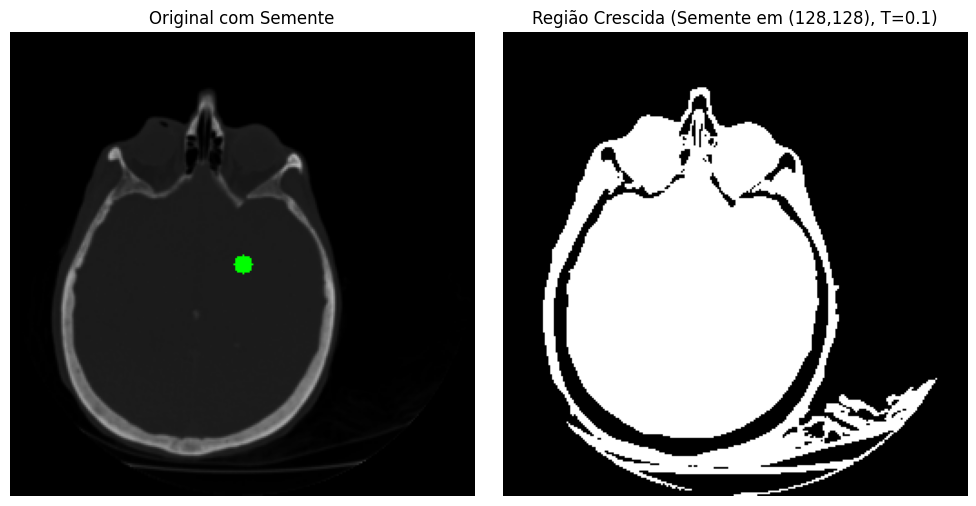

In [ ]:
# example Python: Crescimento of Regiões (Simplificado) print("\n--- Exemplo Prático: Crescimento de Regiões (Simplificado) ---") from collections import deque # to use the fila (queue)  # use image_float_g e your dimensions M_g, N_g  # parameters to the crescimento of região # Escolher the semente. to the image of the cérebro, one point bright in the interior. # Inspecione the image image_float_g to escolher the boa semente. # example (can precisar of ajuste): idx_linha_semente = M_g // 2 idx_col_semente = N_g // 2 # check if the semente initial não é muito dark (fundo) if image_float_g[idx_linha_semente, idx_col_semente] < 0.1: # if for muito dark, tenta outra  idx_linha_semente = M_g // 3  idx_col_semente = N_g // 2  if image_float_g[idx_linha_semente, idx_col_semente] < 0.1:  idx_linha_semente = M_g // 2 + 20; idx_col_semente = N_g //2 + 20   valor_semente = image_float_g[idx_linha_semente, idx_col_semente] print(f"Semente in ({idx_linha_semente},{idx_col_semente}) with valor {valor_semente:.2f}")  limiar_similaridade_rg = 0.1 # Diferença máxima of intensidade to be considerado similar  img_segmentada_rg = np.zeros_like(image_float_g, dtype=np.uint8) fila_rg = deque()  if 0 <= valor_semente <= 1: # Garante that the semente é válida  img_segmentada_rg[idx_linha_semente, idx_col_semente] = 1  fila_rg.append((idx_linha_semente, idx_col_semente))   # # process the fila  while fila_rg:  r_atual, c_atual = fila_rg.popleft()   # # check 8 vizinhos  for dr in [-1, 0, 1]:  for dc in [-1, 0, 1]:  if dr == 0 and dc == 0:  continue # Pular the próprio pixel   r_viz, c_viz = r_atual + dr, c_atual + dc   # # check limits of the image  if 0 <= r_viz < M_g and 0 <= c_viz < N_g:  # # check if already was visitado e if satisfaz the critério of similaridade  if img_segmentada_rg[r_viz, c_viz] == 0 and \  np.abs(image_float_g[r_viz, c_viz] - valor_semente) < limiar_similaridade_rg:  # # (Critério simple: similaridade with the semente original)  # # (one critério mais robusto usaria the average of the região already crescida)  img_segmentada_rg[r_viz, c_viz] = 1  fila_rg.append((r_viz, c_viz)) else:  print("Valor of semente inválido or fora of faixa esperada.")   # Visualização img_original_com_semente = img_as_ubyte(image_float_g.copy()) img_original_com_semente = cv2.cvtColor(img_original_com_semente, cv2.COLOR_GRAY2BGR) if 0 <= valor_semente <= 1: # Desenha if the semente was válida  cv2.circle(img_original_com_semente, (idx_col_semente, idx_linha_semente), 5, (0,255,0), -1) # Semente in verde   plot_images_c5([img_original_com_semente, img_segmentada_rg],  ["Original with Semente", f"Região Crescida (Semente in ({idx_linha_semente},{idx_col_semente}), T={limiar_similaridade_rg})"],  cmaps=['gray','gray'], figsize=(10,5)) # cmap não if applies the img_original_com_semente if BGR 

Interpretando the results (Crescimento of Regiões):* original with Semente: shows the original image with one círculo verde indicating the pixel semente initial.* Região Crescida: shows the região binary that was "crescida" the partir of the semente. All the pixels brancos in this image were considerados similar to the semente (or to the região in expansão, dependendo of the critério) and conectados to the semente.* the size and the shape of the região dependem fortemente of the posição of the semente and of the `limiar_similaridade_rg`.

exercise (Crescimento of Regiões):1. Altere the coordenadas `idx_linha_semente` and `idx_col_semente` to different points of the image (ex: the área clearly dark, the área of intensidade average, perto of the borda). Observe the região crescida muda.2. Altere the `limiar_similaridade_rg` to values smaller (ex: `0.05`) and larger (ex: `0.2`). the This afeta the size of the região segmentada?3. (optional) Modifique the critério of similaridade to that one pixel whether adicionado if your intensidade for similar to the average of the região already crescida, in vez of only to the pixel semente initial. This tornaria the algoritmo more adaptativo.